## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
df.tail()

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164


,DATE,TAG,POSTS
2566,2023-03-01 00:00:00,python,18203
2567,2023-03-01 00:00:00,r,4075
2568,2023-03-01 00:00:00,ruby,332
2569,2023-03-01 00:00:00,rust,792
2570,2023-03-01 00:00:00,swift,1591


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2571, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2571
TAG      2571
POSTS    2571
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("TAG").sum("POSTS")

,POSTS
TAG,
assembly,42486
c,394707
c#,1586819
c++,791388
delphi,50734
go,68440
java,1892579
javascript,2485921
perl,67606


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,176,176
c,176,176
c#,177,177
c++,176,176
delphi,176,176
go,161,161
java,176,176
javascript,176,176
perl,176,176


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
type(df['DATE'][0])

str

In [9]:
df["DATE"] = pd.to_datetime(df["DATE"], yearfirst=True)

In [10]:
df.tail()

,DATE,TAG,POSTS
2566,2023-03-01,python,18203
2567,2023-03-01,r,4075
2568,2023-03-01,ruby,332
2569,2023-03-01,rust,792
2570,2023-03-01,swift,1591


## Data Manipulation



In [11]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,rust,swift
DATE,,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,289.0,2183.0,6033.0,3304.0,116.0,750.0,6794.0,14353.0,110.0,3360.0,22878.0,4633.0,466.0,786.0,1674.0
2022-12-01,284.0,1863.0,5341.0,2866.0,86.0,632.0,5983.0,12553.0,95.0,2893.0,19336.0,3689.0,395.0,791.0,1469.0
2023-01-01,240.0,1515.0,5398.0,2674.0,114.0,738.0,5793.0,12283.0,75.0,3091.0,18089.0,3761.0,374.0,806.0,1448.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.shape

(177, 15)

In [13]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'rust', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
reshaped_df.count()

TAG
assembly      176
c             176
c#            177
c++           176
delphi        176
go            161
java          176
javascript    176
perl          176
php           176
python        176
r             174
ruby          176
rust          131
swift         168
dtype: int64

In [15]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.count()

TAG
assembly      177
c             177
c#            177
c++           177
delphi        177
go            177
java          177
javascript    177
perl          177
php           177
python        177
r             177
ruby          177
rust          177
swift         177
dtype: int64

In [16]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

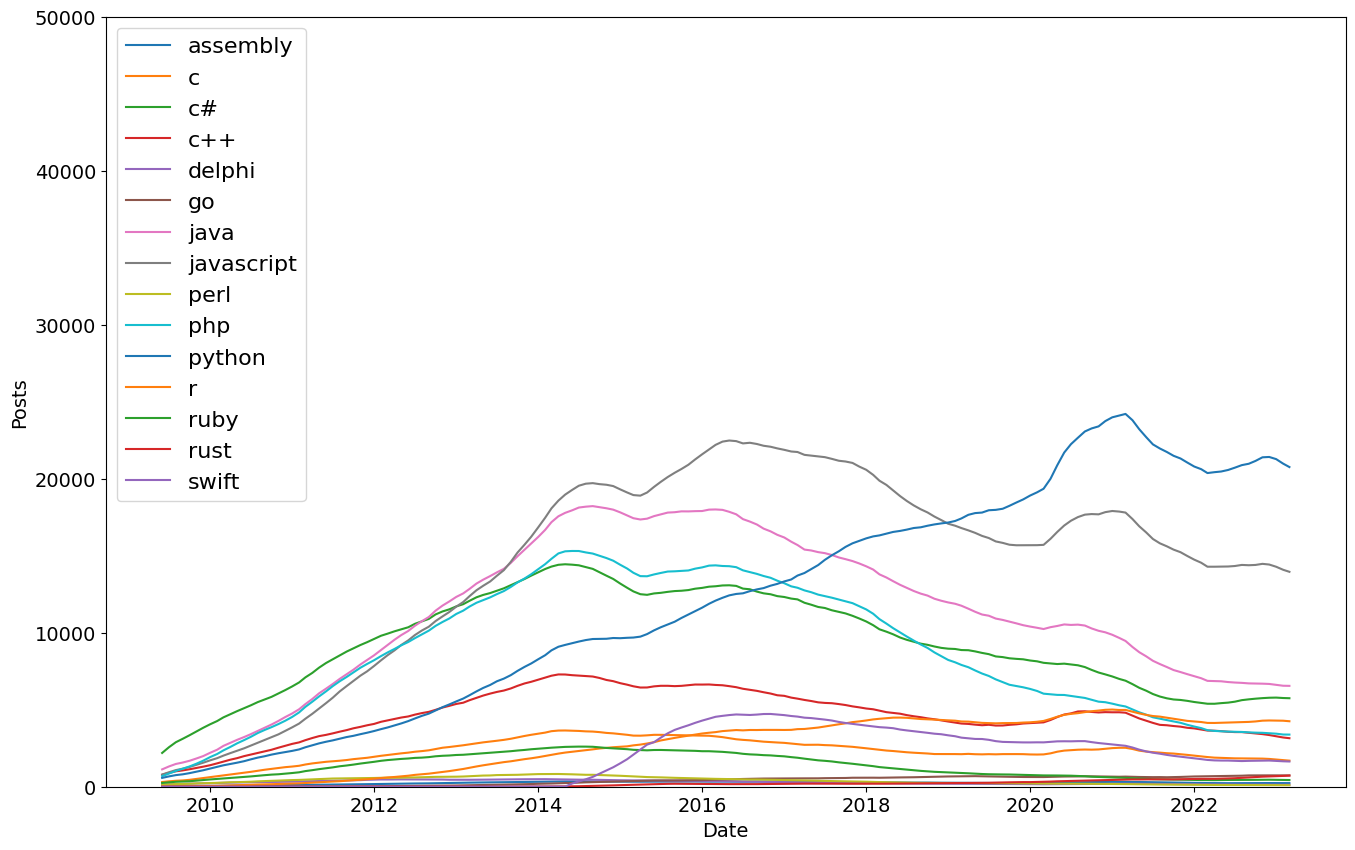

In [21]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.ylim(0, 50000)
#plt.plot(df["DATE"], df["POSTS"])
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)
plt.legend(fontsize=16) 

In [18]:
x = reshaped_df.fillna(0)
x.loc['2023':'2023'].sum().idxmax()

'python'

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

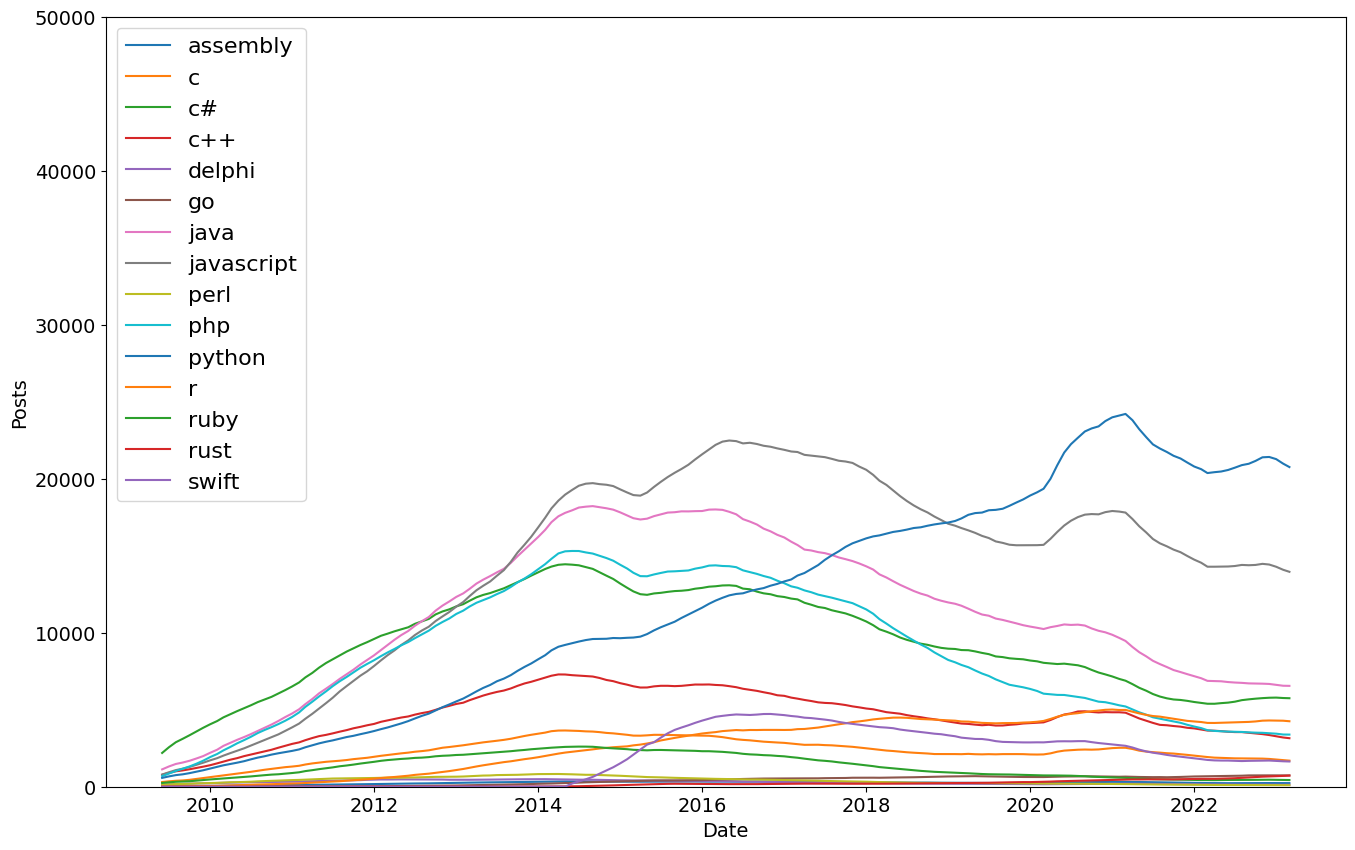

In [19]:
reshaped_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.ylim(0, 50000)
#plt.plot(df["DATE"], df["POSTS"])

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)
plt.legend(fontsize=16) 